Introduction:

The purpose of this study is to clean up the data and provide insights on the shopping behaviors of Instacart's customers.
The main steps of the project are as follows: 
1. Open data files to examine their contents. 
2. Clean up the data by verifying data types, find and fill in missing values, find and remove duplicates. 
3. Analyze the data by examining shopping patterns incliuding:
a.Most popular time of day to shop 
b.Most popular day to show 
c.How long between order placements
d.Distribution of order
e. Top 20 products ordered 
f. How many items purchased in one order and the distribution 
g. Top 20 most reordered items 
The visualizations of the data will provide useful insights for Instacart to better serve their customers.  

In [1]:
import pandas as pd #import pandas library assigning alias pd 

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep =';') #open data file: /datasets/instacart_orders.csv

In [3]:
instacart_orders.info() #Looking at general contents of table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
display(instacart_orders)#Closer look at data 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [5]:
products = pd.read_csv('/datasets/products.csv',sep=';')#open data file: /datasets/products.csv

In [6]:
products.info()#Looking at general contents of table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
display(products) #Closer look at data 

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [8]:
aisles = pd.read_csv('/datasets/aisles.csv',sep = ';')#open data file: /datasets/aisles.csv

In [9]:
aisles.info()#Looking at general contents of table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
display(aisles)#Closer look at data 

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [11]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')#open data file:/datasets/departments.csv

In [12]:
departments.info()#Looking at general contents of table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
display(departments)#Closer look at data 

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
order_products = pd.read_csv('/datasets/order_products.csv', sep =';')#open data file:/datasets/order_products.csv

In [15]:
order_products.info(show_counts=True)#Looking at general contents of table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [16]:
display(order_products)#Closer look at data 

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [17]:
# Check for duplicated orders
instacart_orders.duplicated().sum()
instacart_orders[(instacart_orders.duplicated(keep= False))].sort_values('order_id')  

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


In [18]:
# Check for all orders placed Wednesday at 2:00 AM
orders_wed_2am = instacart_orders[(instacart_orders['order_dow']== 3)& (instacart_orders['order_hour_of_day']==2)]
orders_wed_2am.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


In [19]:
# Remove duplicate orders
instacart_orders = instacart_orders.drop_duplicates(subset='order_id')

In [20]:
# Double check for duplicate rows
instacart_orders.duplicated().sum() 


0

In [21]:
# Double check for duplicate order IDs only
instacart_orders.duplicated(subset='order_id').sum()

0

### `products` data frame

In [22]:
# Check for fully duplicate rows
products.duplicated().sum() 
display(products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [23]:
# Check for just duplicate product IDs
products.duplicated(subset='product_id')
display(products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [24]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_lower = products['product_name'].str.lower()
display(products_lower)


0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

In [25]:
# Check for duplicate product names that aren't missing
duplicate_names = products[products['product_name'].notna()& products['product_name'].str.lower().duplicated()]
display(duplicate_names)

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


### `departments` data frame

In [26]:
#show duplicates
departments.duplicated().sum() 
display(departments)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
#show number of duplicates
departments = departments.drop_duplicates(subset='department')
display(departments.duplicated(subset='department').sum())

0

### `aisles` data frame

In [28]:
#show duplicates
aisles.duplicated().sum() 
display(aisles)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [29]:
#show number of duplicates
aisles = aisles.drop_duplicates(subset='aisle')
display(aisles.duplicated(subset='aisle').sum())

0

### `order_products` data frame

In [30]:
# Check for fullly duplicate rows
order_products.duplicated().sum()


0

In [31]:
# Double check for any other tricky duplicates
tricky_duplicates = order_products[order_products.duplicated(subset= ['order_id','product_id'], keep = False)]
display(tricky_duplicates.duplicated().sum())

0

## Find and remove missing values


### `products` data frame

In [32]:
#display data frame 
products.info()
display(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [33]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = products[products['product_name'].isna()]
display(missing_product_names)
if (missing_product_names['aisle_id']==100).all():
    print('Yes!')
else: 
    print('No!')

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Yes!


In [34]:
# Are all of the missing product names associated with department ID 21?
missing_department_id_21 = products[(products['product_name'].isna()) & (products['department_id']==21)]
display(missing_department_id_21)
if (missing_product_names['department_id']==21).all():
    print('Yes!')
else: 
    print('No!')

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Yes!


In [35]:
# What is this ailse and department?
filtered_products_info_aisle = aisles[aisles['aisle_id'] ==100]
filtered_products_info_deparment = departments[departments['department_id']==21]
display(filtered_products_info_aisle)
display(filtered_products_info_deparment)

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [36]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown',inplace=True)
display(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

### `orders` data frame

In [37]:
#display data frame 
instacart_orders.info()
display(instacart_orders)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [38]:
# Are there any missing values where it's not a customer's first order?
instacart_orders['days_since_prior_order'].isnull().sum()

28817

### `order_products` data frame

In [39]:
#display data frame 
display(order_products)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [40]:
# What are the min and max values in this column?
min_value_col = order_products['add_to_cart_order'].min() 
max_value_col = order_products['add_to_cart_order'].max() 
display(min_value_col)
display(max_value_col)

1.0

64.0

In [41]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
miss_add_to_cart = order_products[order_products['add_to_cart_order'].isnull()]
display(miss_add_to_cart)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [42]:
# Do all orders with missing values have more than 64 products?
order_products[order_products['order_id'].isin(miss_add_to_cart)].groupby('order_id').size().sort_values()


Series([], dtype: int64)

In [43]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order']= order_products['add_to_cart_order'].fillna(999).astype(int)
display(order_products)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [44]:
#show hour of day ranges
hour_min = instacart_orders['order_hour_of_day'].min()
hour_max = instacart_orders['order_hour_of_day'].max()
display(f"Order hour of day ranges from {hour_min} to {hour_max}.")

'Order hour of day ranges from 0 to 23.'

In [45]:
#show day of week ranges
dow_min = instacart_orders['order_dow'].min()
dow_max = instacart_orders['order_dow'].max()
display(f"Order day of week ranges from {dow_min} to {dow_max}.")

'Order day of week ranges from 0 to 6.'

### [A2] What time of day do people shop for groceries?

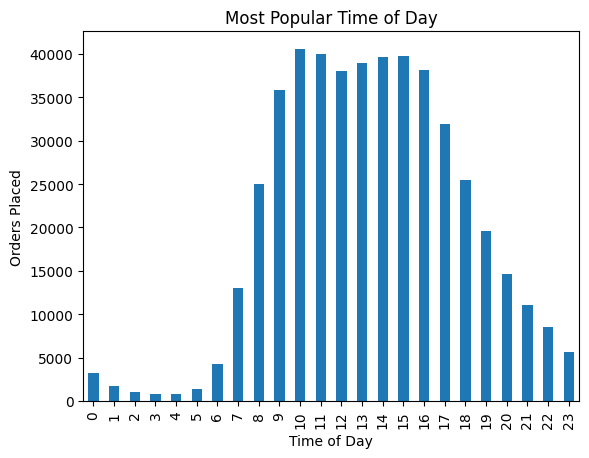

In [46]:
#import plt 
import matplotlib.pyplot as plt 
#Show most popular time of day
instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
title = 'Most Popular Time of Day',
xlabel='Time of Day',
ylabel='Orders Placed')
plt.show()


Conclusion: People typically prefer to shop in the mid morning and afternoon, then at night or early hours of the morning. 

### [A3] What day of the week do people shop for groceries?

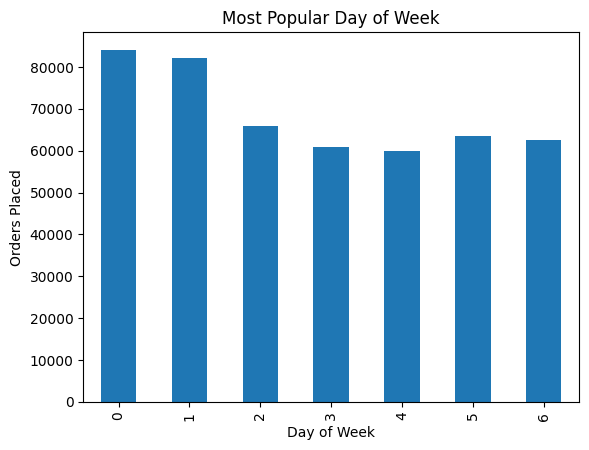

In [47]:
#import plt 
import matplotlib.pyplot as plt 
#most popular day of week
instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar', 
title = 'Most Popular Day of Week',
xlabel='Day of Week',
ylabel='Orders Placed')
plt.show()
                                            

Conclusion: Weekends are the most popular day of the week to shop on instacart. 

### [A4] How long do people wait until placing another order?

Text(0, 0.5, 'Orders Placed')

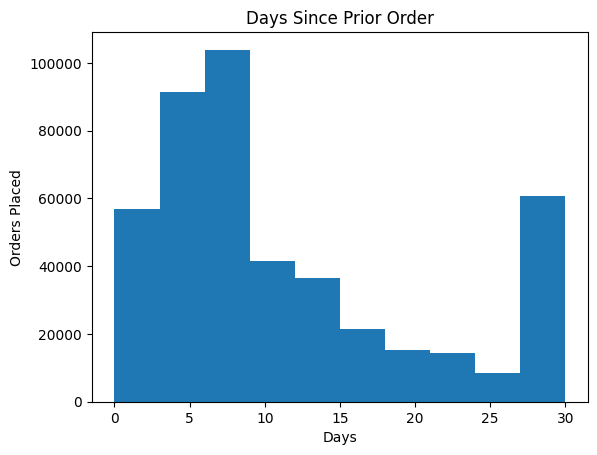

In [48]:
#import plt 
import matplotlib.pyplot as plt 
#time between orders
instacart_orders['days_since_prior_order'].plot(kind='hist')
plt.title('Days Since Prior Order')
plt.xlabel('Days') 
plt.ylabel('Orders Placed') 


Conclusion: Orders are typically placed within 5-10 days of the previous orders. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

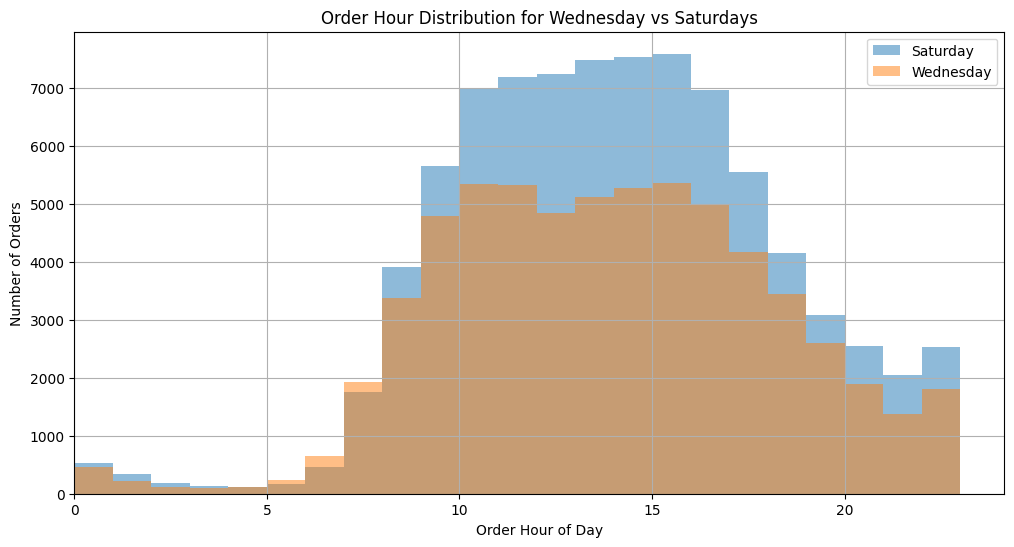

In [49]:
#Import plot
import matplotlib.pyplot as plt 

# Saturday is 0 and Wednesday is 5 
saturday_orders = instacart_orders[instacart_orders ['order_dow'] ==0] 
wednesday_orders = instacart_orders[instacart_orders ['order_dow'] ==5]

#Create histogram to show distrubtion on Wednesday & Saturdays 
plt.figure(figsize=(12,6))
bins = range(24)
saturday_orders ['order_hour_of_day'].hist(bins=bins, alpha=0.5, label='Saturday')
wednesday_orders ['order_hour_of_day'].hist(bins=bins, alpha=0.5, label='Wednesday')

plt.title('Order Hour Distribution for Wednesday vs Saturdays')
plt.xlabel('Order Hour of Day')
plt.ylabel('Number of Orders')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend() 
plt.show()

# Describe the difference: More orders are placed on Saturday, then Wednesday. Orders placed on Saturday are most popular at hour 16. While, orders place on Wednesday are most commonly placed at hour 10. 

Conclusion: Saturday is the most popular day to place orders at about hour 16. While Wednesday typically sees an increase in orders at hour 10. 

### [B2] What's the distribution for the number of orders per customer?

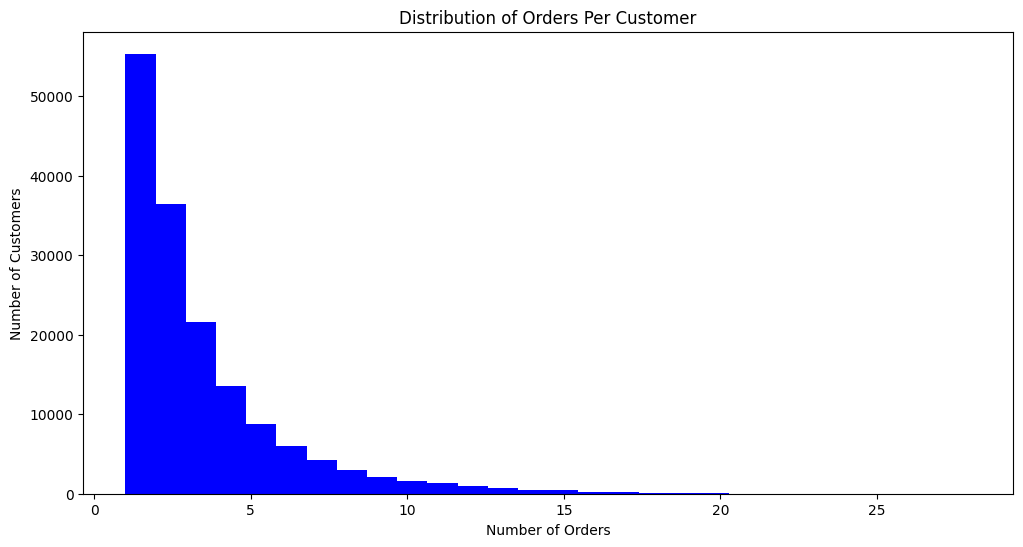

In [50]:
#Show distribution for the number of orders per customer
import matplotlib.pyplot as plt 
num_orders_per_customer = instacart_orders.groupby('user_id')['order_id'].count()

plt.figure(figsize=(12,6))
plt.hist(num_orders_per_customer, color='blue', bins=28)
bins = range(24)
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

Conclusion: The skewed graph indicates that the majority of customers place less than 5 orders. 

### [B3] What are the top 20 popular products (display their id and name)?

In [51]:
#20 most popular products 
popular_products = order_products['product_id'].value_counts().head(20)
df_popular_products = pd.DataFrame(popular_products).reset_index()
df_popular_products.columns= ['product_id', 'order_count'] 

In [52]:
#Merge 
df_product_names = df_popular_products.merge(products, on = 'product_id') 

In [53]:
#Display 
display(df_product_names)

,product_id,order_count,product_name,aisle_id,department_id
0,24852,66050,Banana,24,4
1,13176,53297,Bag of Organic Bananas,24,4
2,21137,37039,Organic Strawberries,24,4
3,21903,33971,Organic Baby Spinach,123,4
4,47209,29773,Organic Hass Avocado,24,4
5,47766,24689,Organic Avocado,24,4
6,47626,21495,Large Lemon,24,4
7,16797,20018,Strawberries,24,4
8,26209,19690,Limes,24,4
9,27845,19600,Organic Whole Milk,84,16


Conclusion: The most popular 20 products is mostly comprised of organic fruit such as bananas with a few vegetables such as zucchini. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

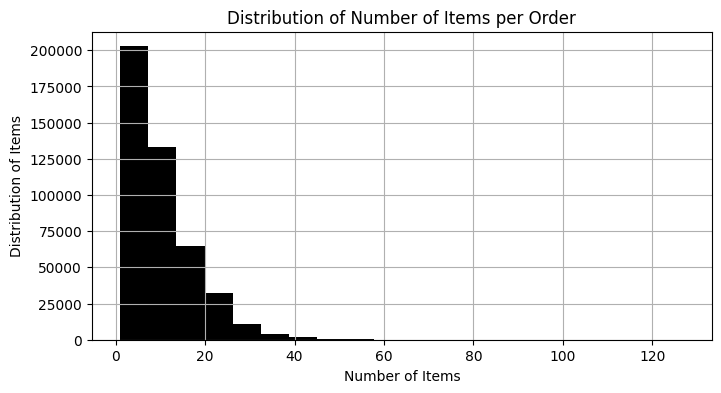

In [54]:
#import plt
import matplotlib.pyplot as plt 

#Number of items per order calculation 
number_items_per_order = order_products.groupby('order_id').size()

#Creating visual 
plt.figure(figsize=(8,4))
plt.hist(number_items_per_order, color= 'black', bins=20)
plt.title ('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Distribution of Items')
plt.grid()
plt.show()

Conclusion: The skewed distribution illustrates most people buy less than 10 items in one order. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [55]:
#Filter names & product IDs most popular items 
reorder_items =order_products[order_products['reordered']==1] 
top_reorder_items =reorder_items['product_id'].value_counts().head(20)
top_reorder_items =top_reorder_items.reset_index()
top_reorder_items.columns= ['product_id','reorder_count']

#Merge 
both_df_merged =top_reorder_items.merge(products[['product_id','product_name']], on='product_id')

#Display 
display(both_df_merged)

,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Conclusion: The items reordered most frequently are organic fruits and a few vegetables. 

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

Conclusion of Project: The goal of the project was to examine Instacart's customers shopping behaviors by clearning up the data and analyzing the trends in the data. The key findings for this data set were people tend to shop mostly on weekends in the morning and afternoon hours. In addtion shoppers tend to buy mostly fruit especially organic fruit and purchase less than 10 items in an order. A challenge I faced while completing this project was applying my new found knowledge of how to create visualizations of data. I plan to practice this new found skillset and review my learning from sprint 2 by consolidating my notes. 